# Plotting animal words

[Project extensions are at the bottom of this file]

Data storytelling is at the heart of data science. It involves turning results into understanding by providing explanations for how and why they occur.

In this chapter, we will practice forming and testing hypotheses with explanatory mechanisms. The focus will be on a dataset derived from a subset of the Google Books Initiative. The subset tracks the publication frequencies for hundreds of animal words in printed materials over the past 300 years.

In this intro, we'll build a reusable function that will help us explore animal word trends throughout the chapter.

### Load the data

Throughout this chapter, we'll use the data file `animal-word-trends.csv`. This tracks the historical usage frequency of animal words in printed materials.

In this dataset, word frequency is normalized to the total words published each year. Specifically, the frequency column measures the number of occurrences of a word in a year per million words published that year.

Load the data into python and take a look.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-word-trends-intro.csv'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd
word_trends = pd.read_csv('animal-word-trends-intro.csv')
word_trends #display it

,year,word,frequency
0,1700,cat,11.601
1,1700,dinosaur,0.000
2,1700,dog,29.388
3,1700,goat,16.707
4,1700,horse,107.127
...,...,...,...
3140,2019,lobster,2.860
3141,2019,penguin,9.146
3142,2019,shrimp,3.948
3143,2019,tuna,2.493


The years in this dataset span from 1700 to 2019.

In 2019, the word "zebra" occurred 1.106 times for every million total words published.

### Plotting trends

Let's visualize the historical changes in usage frequency for the word "horse" using a line plot.

We'll first use a `query()` to extract the horse rows.

Activity Goals:
- Find rows where the word is "horse".
- Display the result.

In [2]:
trend = word_trends.query('word == "horse"')
trend #display it

,year,word,frequency
4,1700,horse,107.127
13,1701,horse,119.436
22,1702,horse,135.049
31,1703,horse,150.645
40,1704,horse,163.304
...,...,...,...
3099,2015,horse,91.868
3109,2016,horse,93.777
3119,2017,horse,95.808
3129,2018,horse,97.602


We can see that "horse" is used almost 100 times more frequently than the word "zebra".

Now let's plot this trend over time using a line plot.

Activity Goals:
- Plot the tend over time.
- Label the y-axis.
- Add a title.

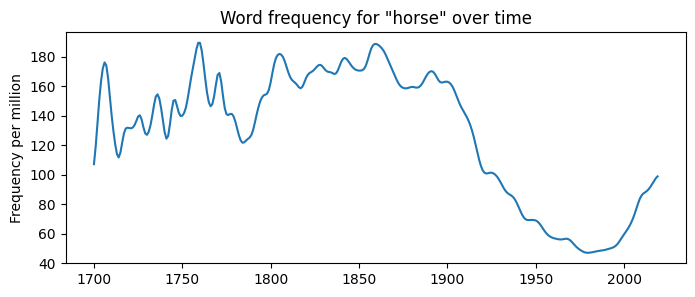

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.plot(trend['year'], trend['frequency'])
plt.ylabel('Frequency per million')
plt.title('Word frequency for "horse" over time')
plt.show()


### Making a reusable function

In this chapter we'll be plotting many word tends. Let's simplify the process by wrapping the plotting code in a reusable definition.

Run the code below to add the function definition to our python workspace:

In [4]:
def plot_word_trend( animal ):
	plt.gcf().set_size_inches(8, 3) # get current figure   
	trend = word_trends.query('word == @animal')
	plt.plot(trend['year'], trend['frequency'], label=animal)
	plt.ylabel('Frequency per million')

Notice how the query accesses the animal variable using the @animal notation.

Now we can simply call the `plot_word_trend()` function whenever we want to visualize the historical usage of an animal word.

Let's re-plot "horse" using this function. Let's also draw an orange axvline for the year 1886. This is year the automobile was invented.

Activity Goals:
- Plot the "horse" word trend.
- Add an orange vertical line for 1886.
- Add a title.

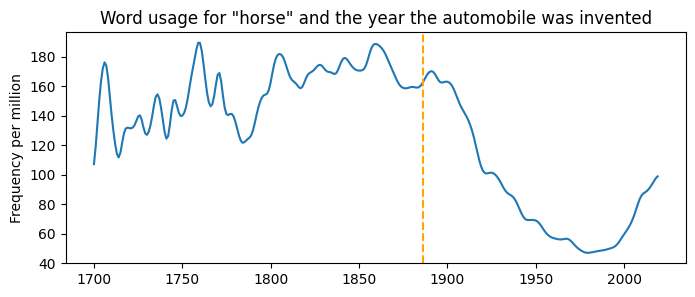

In [5]:
plot_word_trend('horse')
plt.axvline(1886, color='orange', ls='--')
plt.title('Word usage for "horse" and the year the automobile was invented')
plt.show()

After the invention of the horseless carriage, the usage of the word "horse" shows a slight increase followed by a large decrease.

Is this a coincidence, or is there a potential data story here 🤔?

### Plotting multiple trends
We can invoke our function multiple times to visualize multiple trends on the same graph.

For example, which word do you think is used more often in print: "penguin" or "dinosaur"?

Let's find out using our `plot_word_trend()` function.

Activity Goals:
- Plot the "penguin" trend.
- Plot the "dinosaur" trend.
- Add a legend.

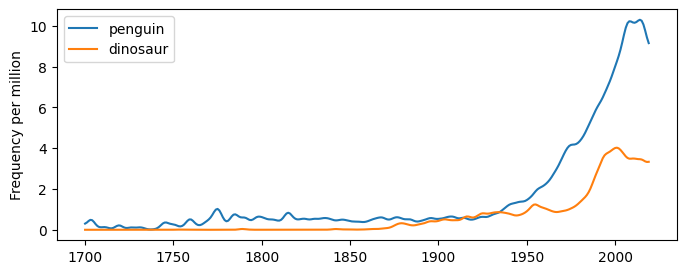

In [6]:
plot_word_trend('penguin')
plot_word_trend('dinosaur')
plt.legend()
plt.show()

And the winner is penguin, which is published about 3 times as frequently. Did you expect that?

### Exploring and forming hypotheses
The US transcontinental railway was completed in 1869. Did this have an impact on the usage of animal words? Using the `plot_word_trend()` function, explore each of the following four animal words:

Activity Goal:
- Explore the four animal word trends.

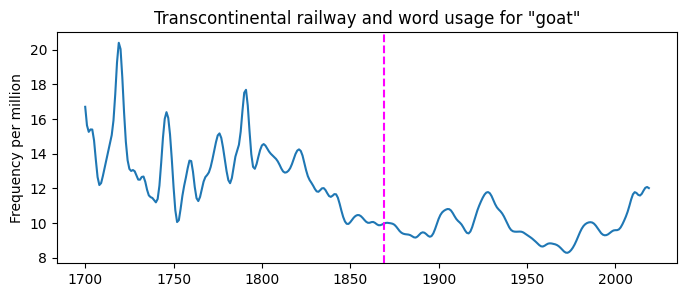

In [7]:
def plot_word_trend_railway(animal):
	plot_word_trend(animal)
	plt.axvline(1869, color='magenta', ls='--')
	plt.title(f'Transcontinental railway and word usage for "{animal}"')

plot_word_trend_railway('goat')
# try 'goat', 'lobster', 'shrimp', 'tuna'

Based on the animal word trends, which animal do you hypothesize gained popularity due to the new railway system?

Observations:

### Explanatory mechanisms

We observed a sharp increase in usage frequency for the word "lobster" after the completion of the transcontinental railway. One hypothesis is that this is causal and the railway helped increase popularity of lobster.

Using a quick internet search, can you find support for this hypothesis or related hypotheses? Do any of the supporting references provide an explanatory mechanism for this observation?

Observations:

While correlation does not prove causation, evidence for causation is stronger when there is a logical explanationory mechanism.

## Project extensions

Below are a few ideas for extensions. 

1. Are "cats" or "dogs" more popular in publications? Graph the word trends for both animals to find out!

2. Download the full dataset (`animal-word-trends.csv` found in "Full animal word trends dataset") and explore the word trends for animals of your choice.

In [8]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-word-trends.csv'.

# from google.colab import files
# uploaded = files.upload()

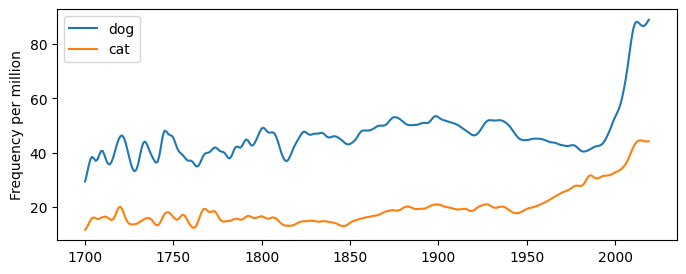

In [11]:
# YOUR CODE HERE (add new cells as needed)

plot_word_trend("dog")
plot_word_trend("cat")
plt.legend()

In [31]:
full_words_trend = pd.read_csv('animal-word-trends.csv')
full_words_trend.iloc[full_words_trend['frequency'].idxmax()]

year                     1929
word         ALL_ANIMAL_WORDS
frequency         3248.923275
Name: 500109, dtype: object